# TASK 1 - Prediction Using Supervised Learning
Predict the percentage of a student based on the number of study hours.

Question: What will be the predicted score if a student studies for 9.25 hrs/day ?

This is a Simple Linear Regression task and involves just 2 variables

### Given Data:
http://bit.ly/w-data

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline


## Reading the Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing the Data

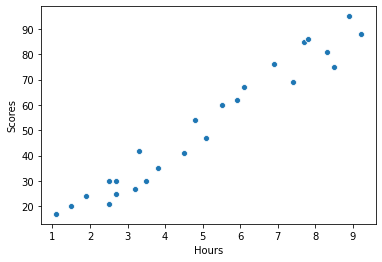

In [6]:
sns.scatterplot(x=data['Hours'], y=data['Scores']);

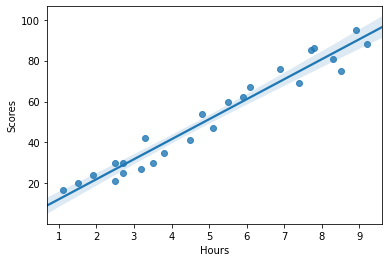

In [8]:
sns.regplot(x=data['Hours'], y=data['Scores'], truncate=False);

## Assigning Feature(s) and Target

In [12]:
X = data[['Hours']]
y = data['Scores']

## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Building the Model

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [15]:
pred_y = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y}) 
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


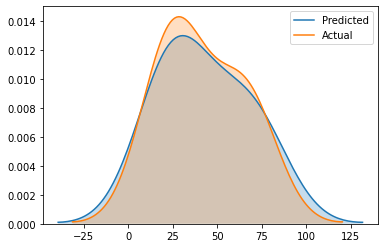

In [18]:
# Actual and Predicted Value Comparison through Distribution Plot

sns.kdeplot(pred_y, label="Predicted", shade=True);
sns.kdeplot(data=y_test, label="Actual", shade=True);

In [19]:
print('Train Accuracy:', regressor.score(X_train, y_train), '\nTest Accuracy:', regressor.score(X_test, y_test))

Train Accuracy: 0.9515510725211552 
Test Accuracy: 0.9454906892105356


In [24]:
# Predict the percentage for custom hour value
# Problem: What will be the the predicted score if a student studies for 9.25 hrs/day ?

hours = [[9.25]]
s = regressor.predict(hours)
print('A student who studies',hours[0][0], 'hours is estimated to score',s[0])

A student who studies 9.25 hours is estimated to score 93.69173248737538


In [25]:
# Model Evaluation using Mean Absolute Error (MAE)

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))

Mean Absolute Error: 4.183859899002975
